# Tabular Data

## Excercise 1: 

Load the data of the file https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz into a list of features X.

The california_housing dataset has a sample size of 20640 datapoints with 8 features and one label.

|feature    |description                              |
|-----------|-----------------------------------------|
|MedInc     |median income in block group             |
|HouseAge   |median house age in block group          |
|AveRooms   |average number of rooms per household    |
|AveBedrms  |average number of bedrooms per household | 
|Population |block group population                   |   
|AveOccup   |average number of household members      |
|Latitude   |block group latitude                     | 
|Longitude  |block group longitude                    |
|-----------|-----------------------------------------|
|MedHouseVal|median house value                       |

This dataset was obtained from the StatLib repository https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts expressed in hundreds of thousands of dollars ($100,000). The dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S.Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). A household is a group of people residing within a home. Since the average\nnumber of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.


The list of features should be a list of lists. The inner list contains all feature values to the corresponding label. Define the label as MedHouseVal. 

Used python modules: 
- io: https://docs.python.org/3.10/library/io.html
- csv: https://docs.python.org/3.10/library/csv.html

In [1]:
########### load original data and normalize them with households and population per block group #################
#
# AveRooms    = totalRooms / households
# AveBedrms   = totalBedrooms / households
# AveOccup    = households / population
#
#################################################################################################################

header = []
with open("../inputs/CaliforniaHousing/cal_housing.domain", "r") as f:
    lines = f.readlines()
    for line in lines:
        header.append(line.split(":")[0])

print(header)

['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 'population', 'households', 'medianIncome', 'medianHouseValue']


In [2]:
import csv
X= []
with open("../inputs/CaliforniaHousing/cal_housing.data", "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    for row in csv_reader:
        row = [float(r) for r in row]
        normalized_row = [row[0], row[1], row[2], row[3]/row[6], row[4]/row[6], row[5], row[5]/row[6], row[7], row[8]]
        X.append(normalized_row)

In [3]:
print("number of feature:", len(X[0]))
print("sample size      :", len(X))
print("---------  first example ---------")
header = ['Longitude', 'Latitude', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 
          'AveOccup', 'MedInc', 'MedHouseVal']
for i, head in enumerate(header):
    print(head,":", X[0][i])


number of feature: 9
sample size      : 20640
---------  first example ---------
Longitude : -122.23
Latitude : 37.88
HouseAge : 41.0
AveRooms : 6.984126984126984
AveBedrms : 1.0238095238095237
Population : 322.0
AveOccup : 2.5555555555555554
MedInc : 8.3252
MedHouseVal : 452600.0


## Exercice 2: 

Load the data into pandas DataFrame: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

A DataFrame represent 2-dim tabular data: 

Data structure also contains labeled axes (rows and columns). Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

In [6]:
import pandas as pd

In [7]:
# transfer data stored in X into pandas primary data structure X_dict: dict-like container of columns. 

index_head = {i:head for i, head in enumerate(header)}
X_dict = {head:[] for head in header}
for row in X:
    for i, item in enumerate(row):
        X_dict[index_head[i]].append(item)


In [8]:
df = pd.DataFrame(X_dict, columns=header)
df.columns

Index(['Longitude', 'Latitude', 'HouseAge', 'AveRooms', 'AveBedrms',
       'Population', 'AveOccup', 'MedInc', 'MedHouseVal'],
      dtype='object')

In [11]:
df.head()

,Longitude,Latitude,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,MedHouseVal
0,-122.23,37.88,41.0,6.984127,1.023810,322.0,2.555556,8.3252,452600.0
1,-122.22,37.86,21.0,6.238137,0.971880,2401.0,2.109842,8.3014,358500.0
2,-122.24,37.85,52.0,8.288136,1.073446,496.0,2.802260,7.2574,352100.0
3,-122.25,37.85,52.0,5.817352,1.073059,558.0,2.547945,5.6431,341300.0
4,-122.25,37.85,52.0,6.281853,1.081081,565.0,2.181467,3.8462,342200.0


Have a look at the data and display some of its statistics with Pandas DataFrame.describe() function:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe

In [14]:
df.describe()

,Longitude,Latitude,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,5.429000,1.096675,1425.476744,3.070655,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2.474173,0.473911,1132.462122,10.386050,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,0.846154,0.333333,3.000000,0.692308,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,4.440716,1.006079,787.000000,2.429741,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,5.229129,1.048780,1166.000000,2.818116,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,6.052381,1.099526,1725.000000,3.282261,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,141.909091,34.066667,35682.000000,1243.333333,15.000100,500001.000000


## Exercise 3:

Compute Pearsons Correlation between variables
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

using Pandas DataFrame.corr() function: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr 

In [15]:
corr = df.corr()
corr

,Longitude,Latitude,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedInc,MedHouseVal
Longitude,1.000000,-0.924664,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.015176,-0.045967
Latitude,-0.924664,1.000000,0.011173,0.106389,0.069721,-0.108785,0.002366,-0.079809,-0.144160
HouseAge,-0.108197,0.011173,1.000000,-0.153277,-0.077747,-0.296244,0.013191,-0.119034,0.105623
AveRooms,-0.027540,0.106389,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.326895,0.151948
AveBedrms,0.013344,0.069721,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.062040,-0.046701
Population,0.099773,-0.108785,-0.296244,-0.072213,-0.066197,1.000000,0.069863,0.004834,-0.024650
AveOccup,0.002476,0.002366,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.018766,-0.023737
MedInc,-0.015176,-0.079809,-0.119034,0.326895,-0.062040,0.004834,0.018766,1.000000,0.688075
MedHouseVal,-0.045967,-0.144160,0.105623,0.151948,-0.046701,-0.024650,-0.023737,0.688075,1.000000


## Exercise 4:

Visualize data with Matplotlib. Matplotlib is a library for data visualization, typically in the form of plots, graphs and charts.

We use the API pyplot. Pyplot is an API (Application Programming Interface) for Python's matplotlib  that effectively makes matplotlib a viable open source alternative to MATLAB. 

First make yourself comfortable with Matplotlib.

In [19]:
import matplotlib.pyplot as plt

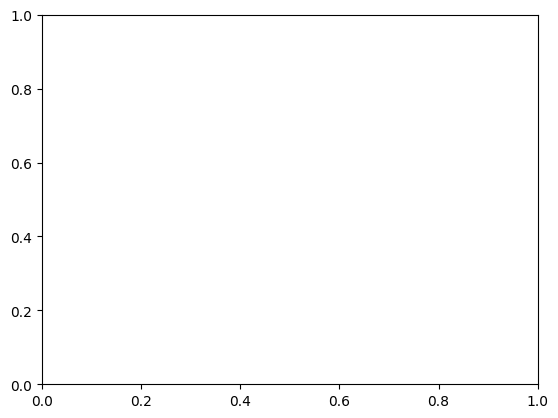

In [20]:
# A plot has a figure and axes
fig = plt.figure()     # add a figure
ax = fig.add_subplot() # add a plot to the figure, returning axis

# or in one step
# fig, ax = fig, ax = plt.subplots()

plt.show()

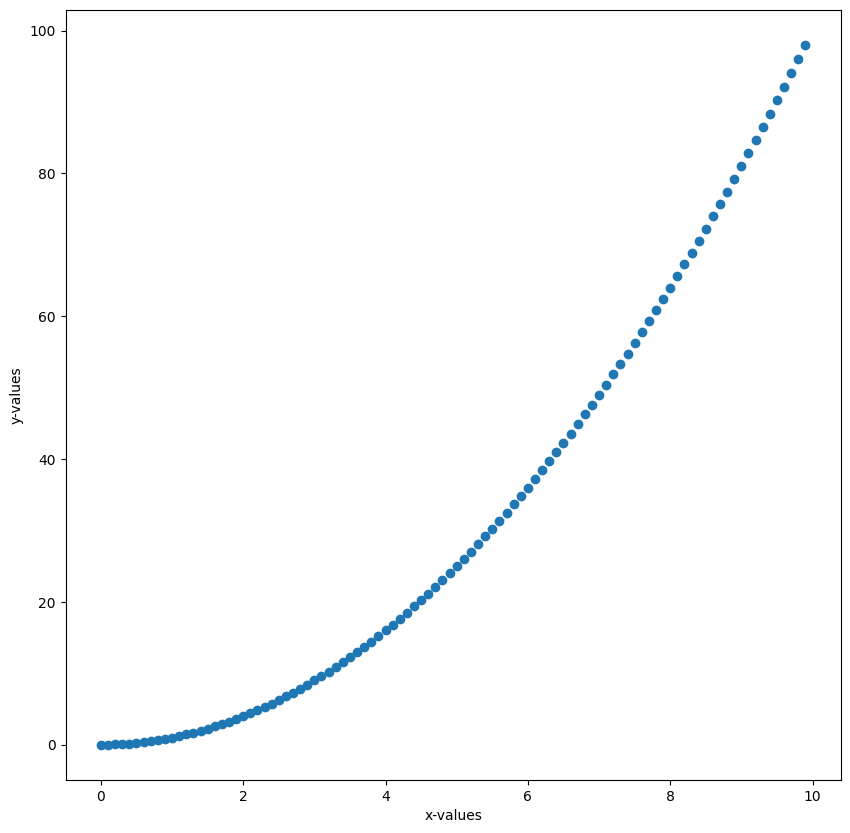

In [21]:
################# work with axes #########
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

# set ticks
#ax.set_xticks([i for i in range(11)])
#ax.set_yticks([i for i in range(0,110,10)])

ax.set_xlabel("x-values")
ax.set_ylabel("y-values")

f=lambda x:x*x
x = [i/10 for i in range(100)]
y = list(map(f,x))

ax.scatter(x,y)

plt.show()

## Exercise 5:
Vizualize the correlation matrix with matplotlib.pyplot.matshow https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html


In [22]:
print(type(corr))
PCC = corr.to_numpy()
print(PCC.shape)

<class 'pandas.core.frame.DataFrame'>
(9, 9)


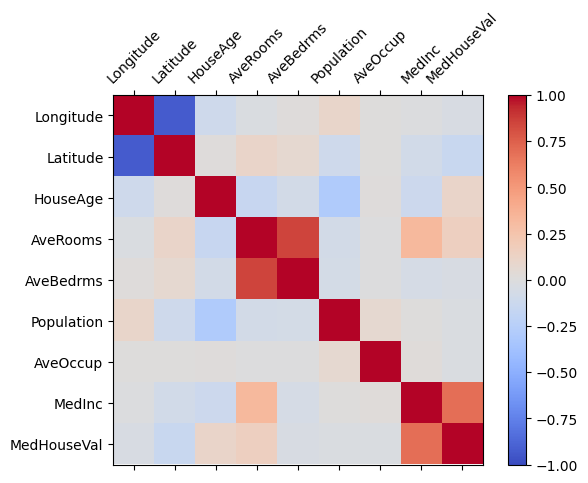

In [23]:
####### Now with ticks and colorbar
fig, ax = plt.subplots()

cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1) #Plot the values of a 2D matrix as color-coded image.
fig.colorbar(cax)

ticks = [i for i in range(len(df.columns))]
ax.set_xticks(ticks)       
plt.xticks(rotation=45)
ax.set_yticks(ticks)

ax.set_xticklabels(df.columns) # use our column names
ax.set_yticklabels(df.columns) # use our column names
plt.show()

In [110]:
# There seems to be a strong positive correlation between MedHouseVal and MedInc. No surprise!
# There seems to be a positive correlation between HouseAge and MedHouseVal
# There seems to be a negative correlation between location and MedHouseVal

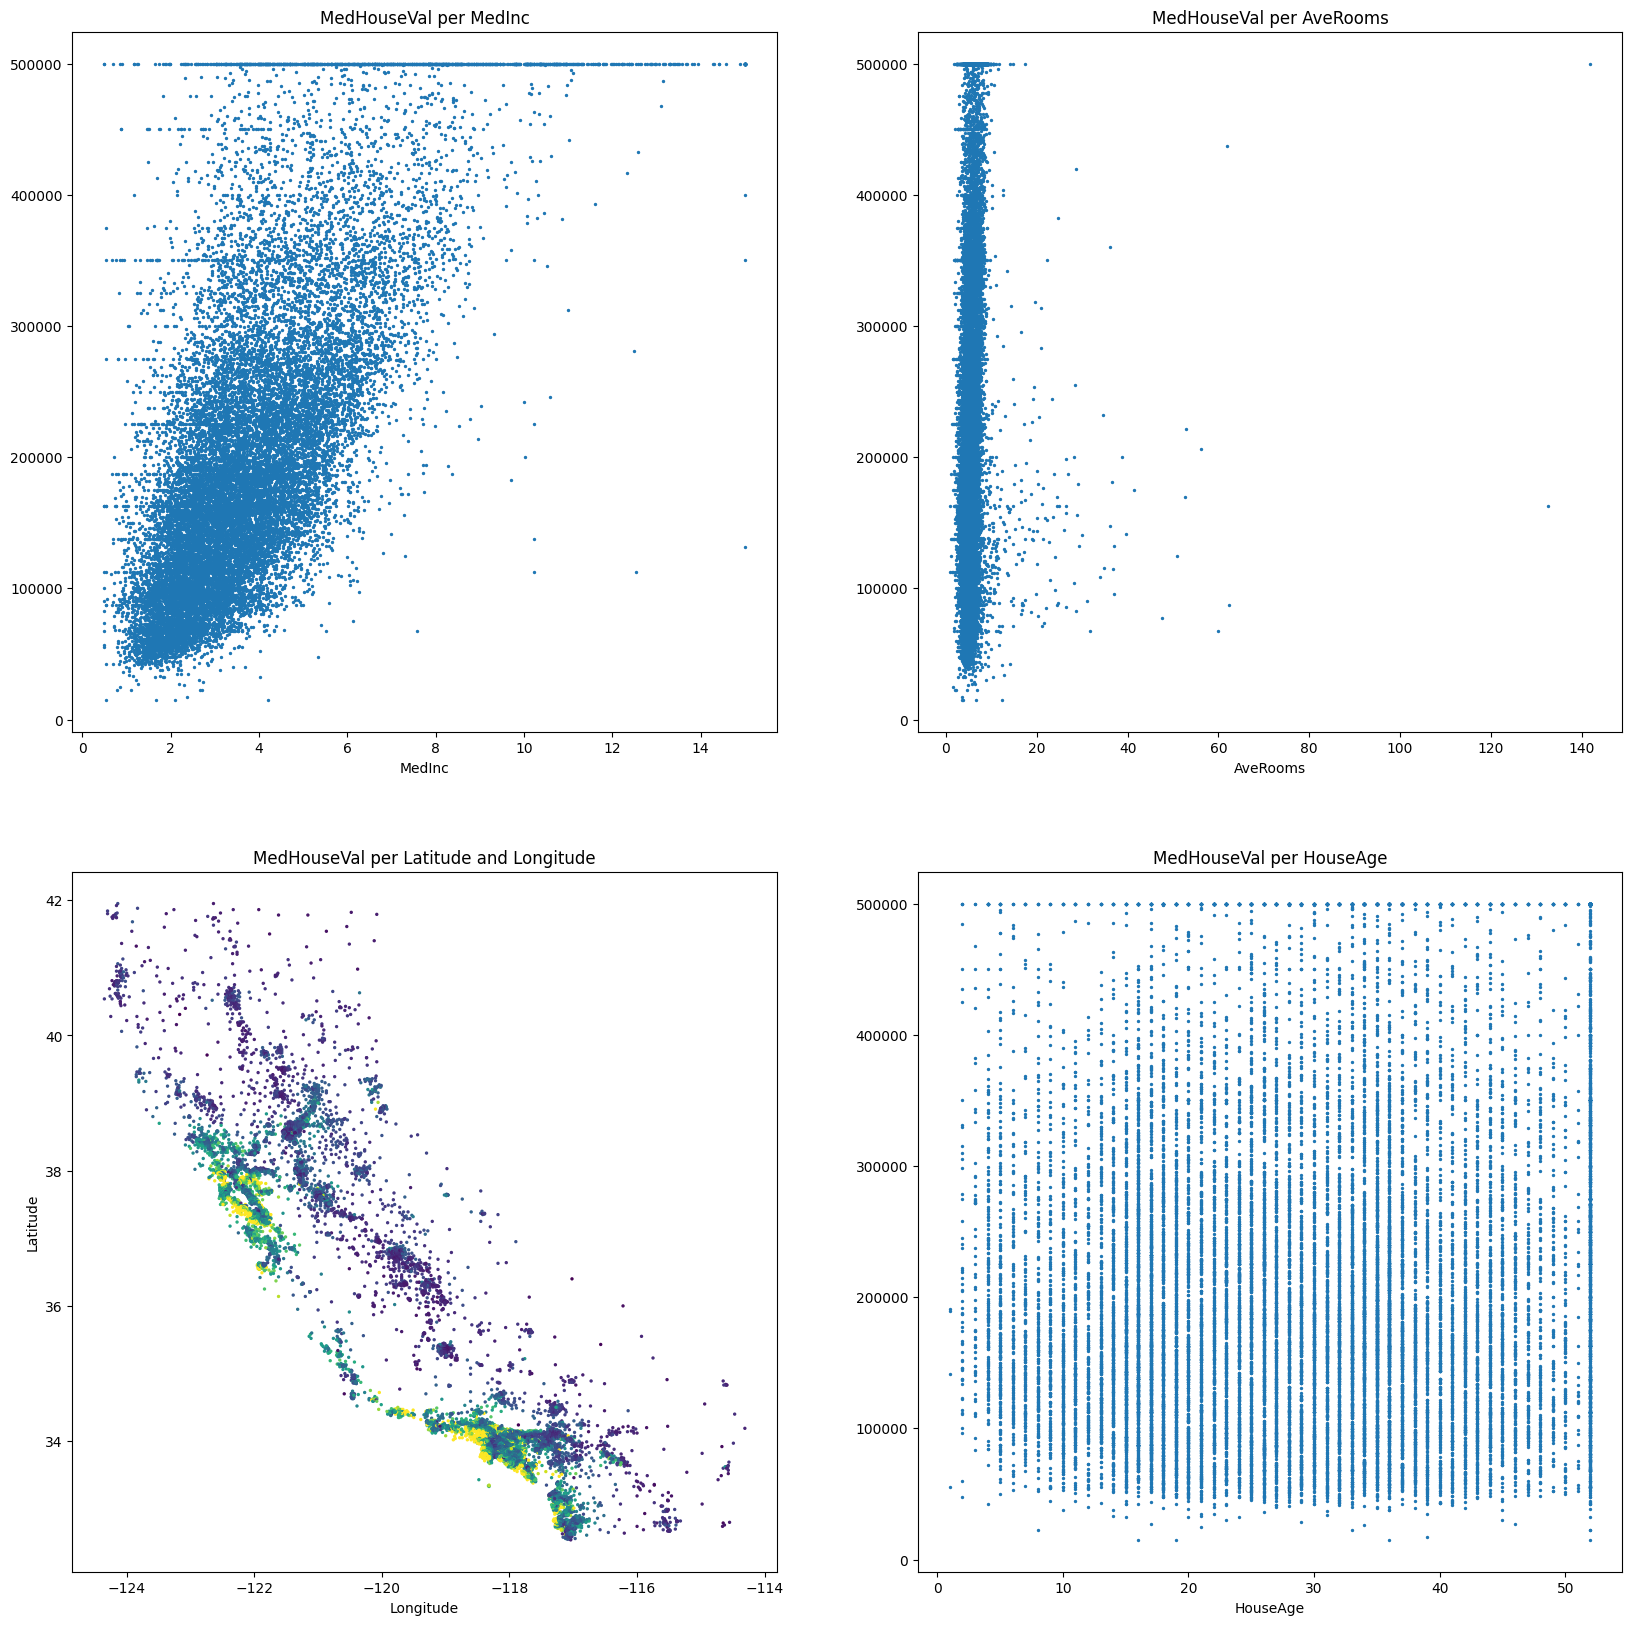

In [123]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].scatter(df['MedInc'], df['MedHouseVal'], s=2)
ax[0,0].set_title('MedHouseVal per MedInc')
ax[0,0].set_xlabel('MedInc')

ax[0,1].scatter(df['AveRooms'], df['MedHouseVal'], s=2)
ax[0,1].set_title('MedHouseVal per AveRooms')
ax[0,1].set_xlabel('AveRooms')

ax[1,0].scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], s=2)
ax[1,0].set_title('MedHouseVal per Latitude and Longitude')
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_ylabel('Latitude')

ax[1,1].scatter(df['HouseAge'], df['MedHouseVal'], s=2)
ax[1,1].set_title('MedHouseVal per HouseAge')
ax[1,1].set_xlabel('HouseAge')

plt.show()

## Exercice 6:

It seems that the MedHouseVal is cut at 500.000. Lets show that with a histogram. A histogram is a representation of the distribution of data. The Pandas DataFrame.hist() function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.

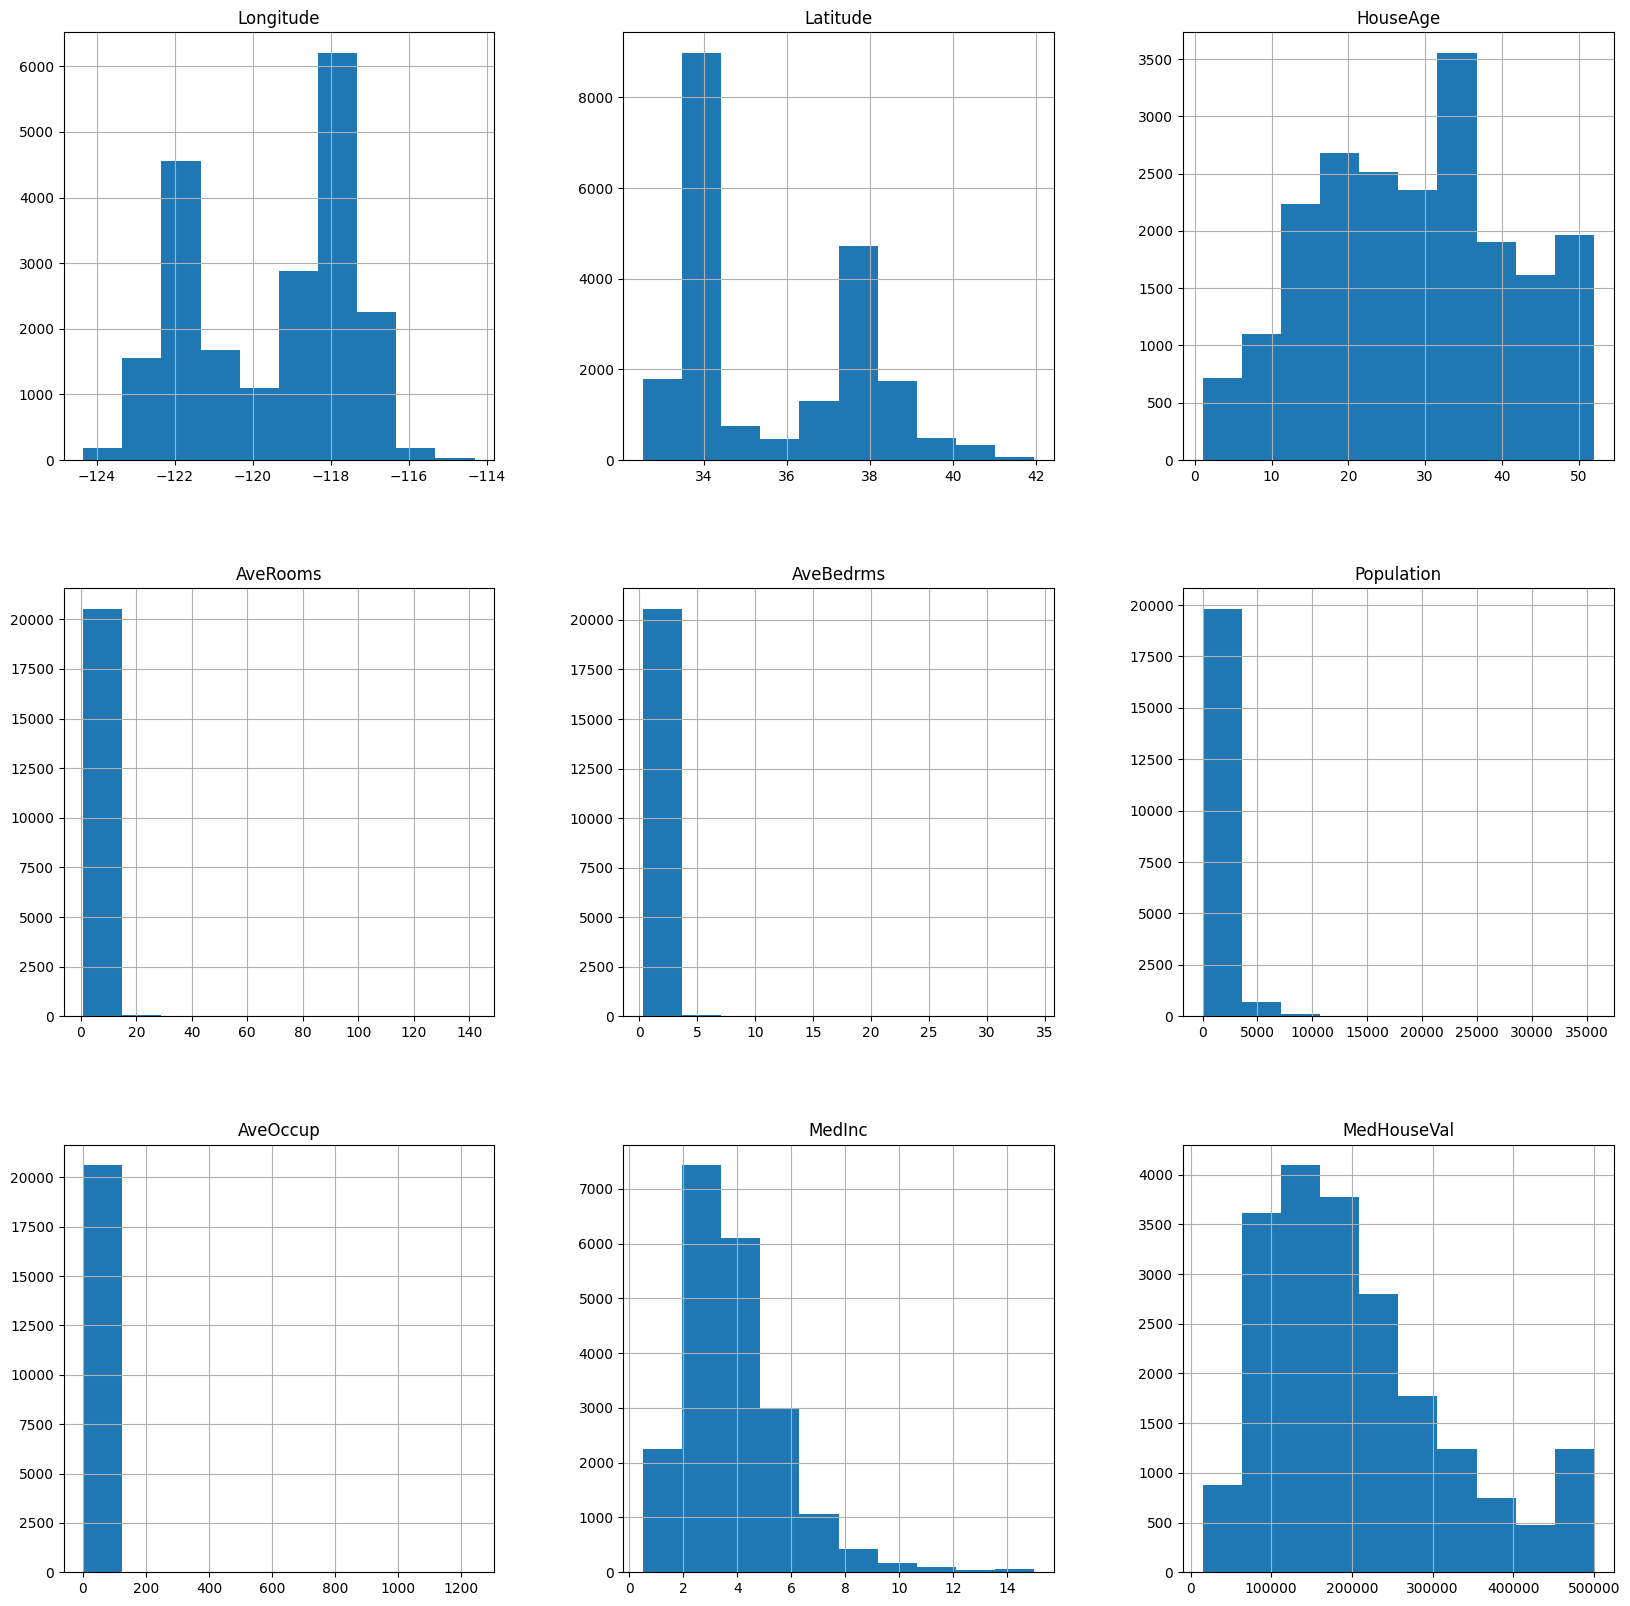

In [32]:
fig, ax = plt.subplots(3,3,figsize=(20,20)) #we have 9 features, so we need 9 subplots (3x3)
df.hist(ax=ax)
plt.show()

The MedHouseVal distribution looks strange. In further investigations we should clear the data. 